In [1]:
import numpy as np
from keras.datasets import mnist
import random
from tqdm import trange

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_y.size

60000

(<matplotlib.image.AxesImage at 0x2265e6c6e60>, 5)

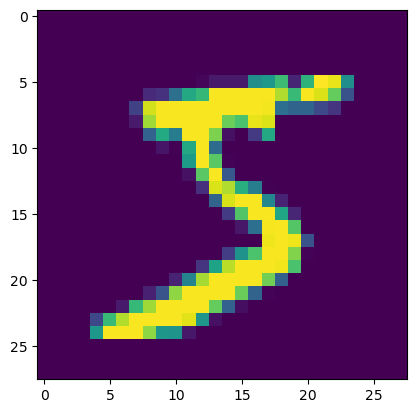

In [4]:
imshow(train_X[0]), train_y[0]

In [5]:
for row in train_X[0]:
    print(" ".join(f"{val:3}" for val in row))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0 

In [6]:
train_X = train_X / 255
test_X = test_X / 255

In [7]:
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

train_y = one_hot(train_y)
test_y = one_hot(test_y)

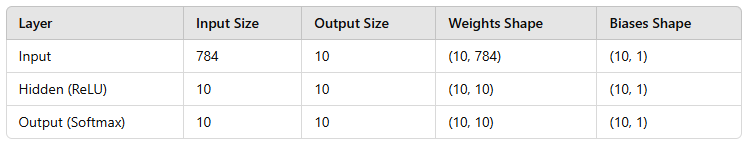

In [59]:
def relu(Z):
    return np.maximum(0, Z)
    
def softmax(Z):
    exp_Z = np.exp(Z)  
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)  

def init_tuners():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5  
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2  # 

def relu_derivative(Z):
    return (Z > 0).astype(int)

def backward(W1, W2, X, Y, A1, A2, Z1):
    m = Y.shape[1]  
    dZ2 = A2 - Y  # (10, m) LOSS
    dW2 = (1 / m) * dZ2.dot(A1.T)  # (10, m) * (m, 10) -> (10,10) Delta Weight. ERROR * Input (that produced the error) scaled over the whole dataset size
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # (10,1)
    
    dZ1 = W2.T.dot(dZ2)  * relu_derivative(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def tuning(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    return W1, b1, W2, b2 

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    Y_classes = np.argmax(Y, axis=0) 
    return np.sum(predictions == Y_classes) / Y_classes.size


epochs = 1000  
learning_rate = 0.1

W1, b1, W2, b2 = init_tuners()  

X = train_X.T
Y = train_y.T

for i in range(epochs):
    Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward(W1, W2, X, Y, A1, A2, Z1)
    W1, b1, W2, b2 = tuning(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    if i % 50 == 0:
        print("Iteration: ", i)
        print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

Iteration:  0
Accuracy:  0.10606666666666667
Iteration:  50
Accuracy:  0.38415
Iteration:  100
Accuracy:  0.5550833333333334
Iteration:  150
Accuracy:  0.6522333333333333
Iteration:  200
Accuracy:  0.7143
Iteration:  250
Accuracy:  0.7534833333333333
Iteration:  300
Accuracy:  0.7786833333333333
Iteration:  350
Accuracy:  0.79665
Iteration:  400
Accuracy:  0.8093333333333333
Iteration:  450
Accuracy:  0.8194833333333333
Iteration:  500
Accuracy:  0.8279333333333333
Iteration:  550
Accuracy:  0.8352333333333334
Iteration:  600
Accuracy:  0.8406666666666667
Iteration:  650
Accuracy:  0.8458
Iteration:  700
Accuracy:  0.85045
Iteration:  750
Accuracy:  0.8546166666666667
Iteration:  800
Accuracy:  0.8578666666666667
Iteration:  850
Accuracy:  0.8609166666666667
Iteration:  900
Accuracy:  0.8633333333333333
Iteration:  950
Accuracy:  0.8661833333333333


In [ ]:
# do it with pytorch to get the hang